# Compare restitution to acceleration for MEMB and MEMS

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from obspy import UTCDateTime, read_inventory
from obspy.clients.arclink import Client

In [2]:
ws = Client(user='bartvle@oma.be', host='poseidon.oma.be', port=18001)

In [3]:
## 2015 Spa (5324) M2.9
# s_time = UTCDateTime('2015-05-13 15:23:56') + 2
# e_time = s_time + 12

In [4]:
## 2018 Waimes (6475) M1.9
s_time = UTCDateTime('2018-04-08 10:33:47') + 2
e_time = s_time + 12

In [5]:
def plot(r1, r2, labels, y):
    for c in ('Z', 'N', 'E'):
        f = plt.figure(figsize=(15, 5))
        [t1] = r1.select(component=c)
        [t2] = r2.select(component=c)
        plt.title(c)
        plt.plot(t1.times(), t1.data, lw=3, label=labels[0])
        plt.plot(t2.times(), t2.data, lw=1, label=labels[1])
        plt.ylabel(y)
        plt.legend()
        plt.grid()
        plt.show()

## 1. Using PAZ and differentiation

In [6]:
memb = ws.get_waveforms('BE', 'MEM', '', 'H*', starttime=s_time, endtime=e_time, route=False, metadata=True)
memb.filter('bandpass', freqmin=1, freqmax=15)
memb.simulate(paz_remove='self')
memb.differentiate()

C:\Miniconda3\envs\phd_py36\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


3 Trace(s) in Stream:
BE.MEM..HHN | 2018-04-08T10:33:48.998393Z - 2018-04-08T10:34:00.998393Z | 100.0 Hz, 1201 samples
BE.MEM..HHZ | 2018-04-08T10:33:48.998393Z - 2018-04-08T10:34:00.998393Z | 100.0 Hz, 1201 samples
BE.MEM..HHE | 2018-04-08T10:33:48.998393Z - 2018-04-08T10:34:00.998393Z | 100.0 Hz, 1201 samples

In [7]:
mems = ws.get_waveforms('BE', 'MEMS', '', '*', starttime=s_time, endtime=e_time, route=False, metadata=True)
mems.filter('bandpass', freqmin=1, freqmax=15)
mems.simulate(paz_remove='self')
mems.differentiate()

C:\Miniconda3\envs\phd_py36\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


3 Trace(s) in Stream:
BE.MEMS..HHZ | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHN | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHE | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples

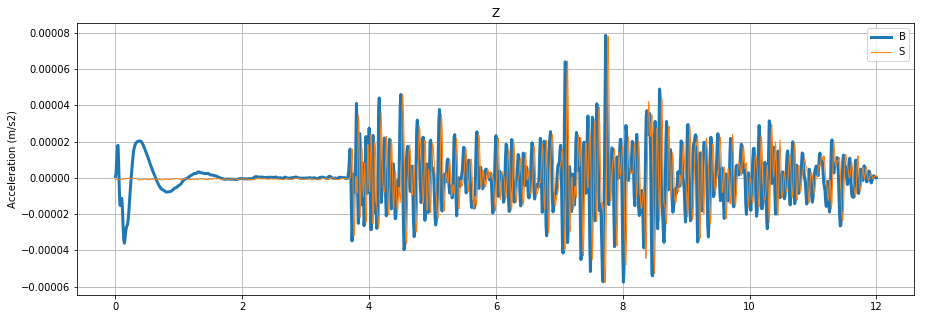

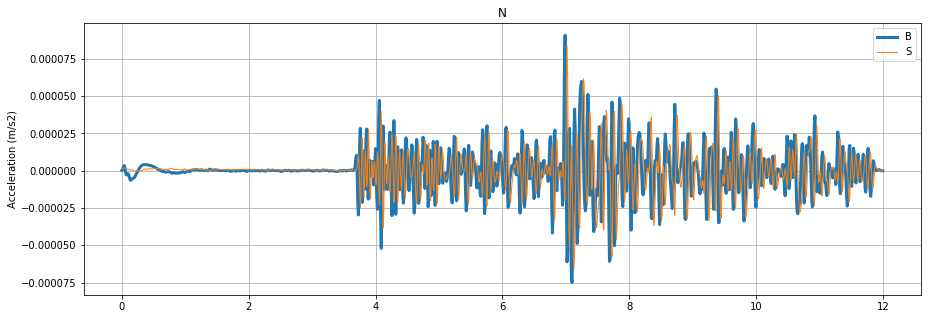

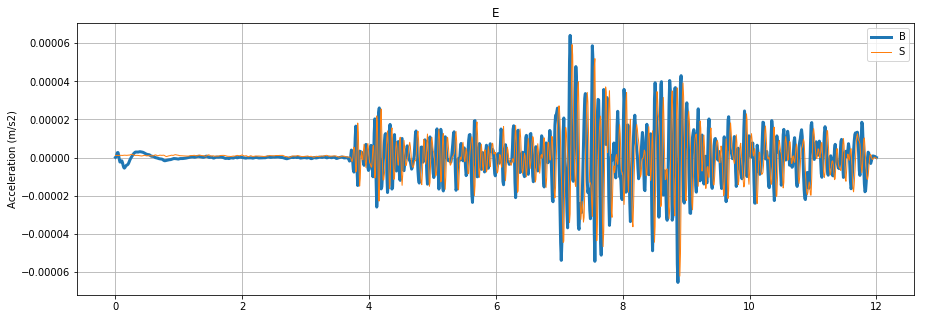

In [8]:
plot(memb, mems, ['B', 'S'], 'Acceleration (m/s2)')

## 2. Direct removal of response to velocity

In [9]:
ws.save_response('workspaces/restitution/responseB', 'BE', 'MEM', '', '*', s_time, e_time, format='SEED')
ws.save_response('workspaces/restitution/responseS', 'BE', 'MEMS', '', '*', s_time, e_time, format='SEED')

In [10]:
invb = read_inventory('workspaces/restitution/responseB')
invs = read_inventory('workspaces/restitution/responseS')

In [11]:
memb1 = ws.get_waveforms('BE', 'MEM', '', 'H*', starttime=s_time, endtime=e_time, route=False, metadata=True)
memb1.simulate(paz_remove='self')

mems1 = ws.get_waveforms('BE', 'MEMS', '', '*', starttime=s_time, endtime=e_time, route=False, metadata=True)
mems1.simulate(paz_remove='self')
mems1.filter('highpass', freq=1)

C:\Miniconda3\envs\phd_py36\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


3 Trace(s) in Stream:
BE.MEMS..HHZ | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHN | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHE | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples

In [12]:
memb2 = ws.get_waveforms('BE', 'MEM', '', 'H*', starttime=s_time, endtime=e_time, route=False, metadata=True)
memb2.remove_response(invb, output='VEL')

mems2 = ws.get_waveforms('BE', 'MEMS', '', '*', starttime=s_time, endtime=e_time, route=False, metadata=True)
mems2.remove_response(invs, output='VEL')
mems2.filter('highpass', freq=1)

3 Trace(s) in Stream:
BE.MEMS..HHZ | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHN | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHE | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples

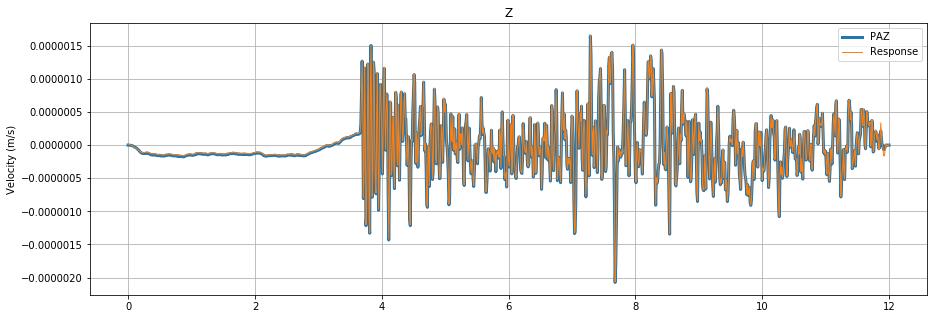

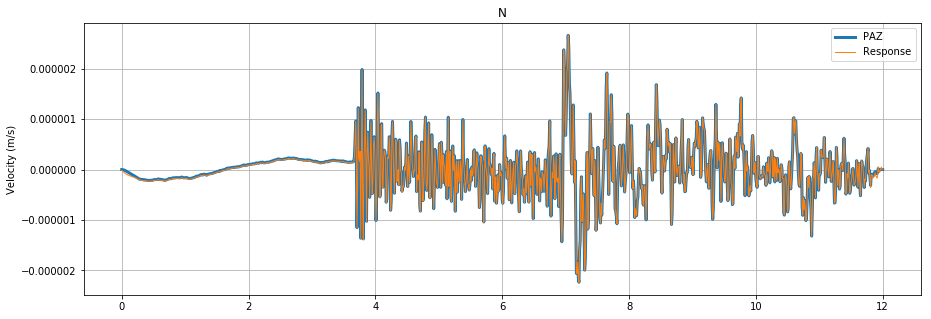

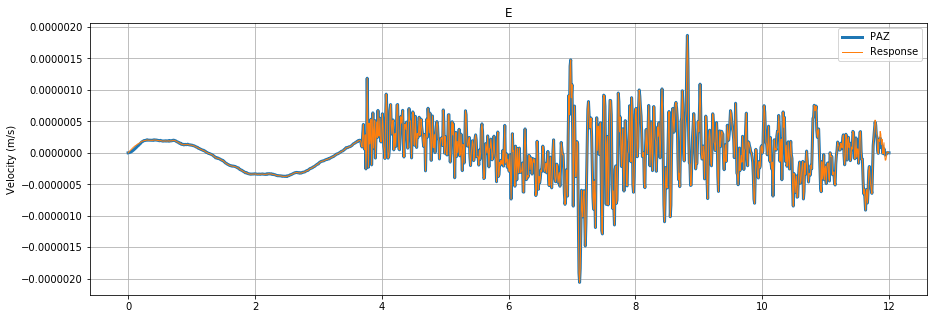

In [13]:
plot(memb1, memb2, ['PAZ', 'Response'], 'Velocity (m/s)')

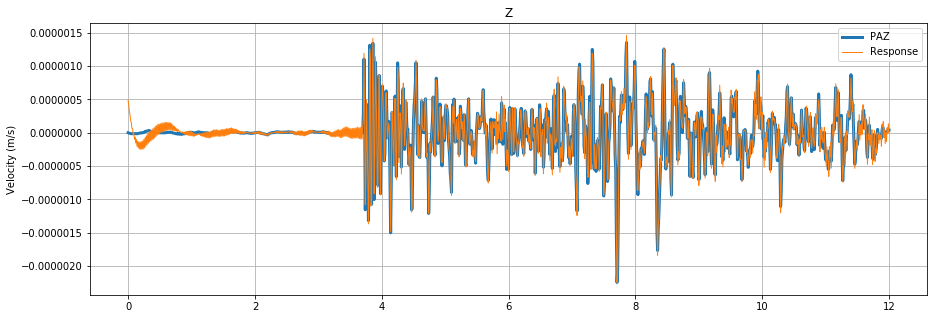

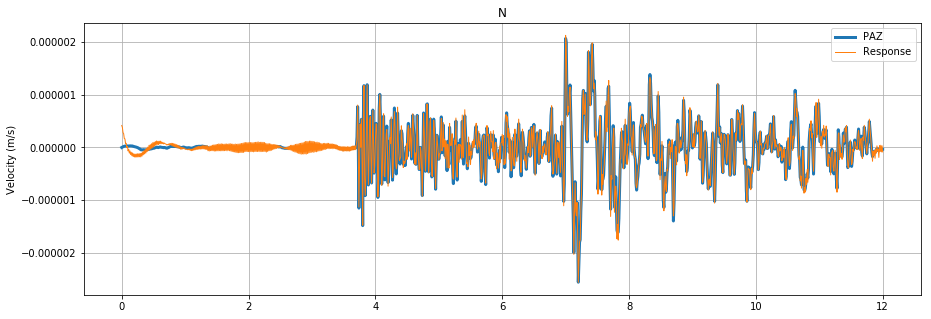

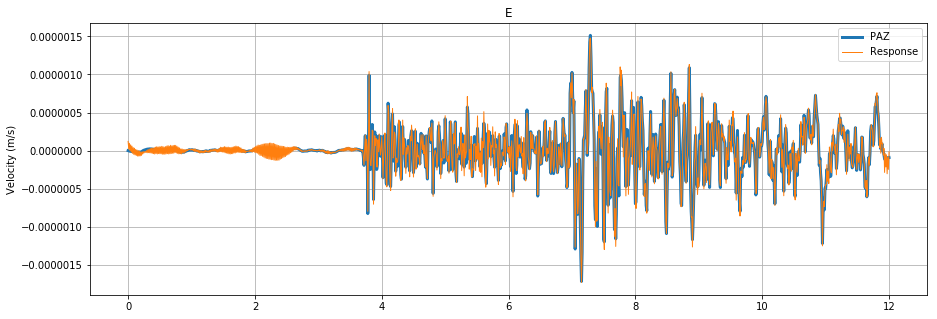

In [14]:
plot(mems1, mems2, ['PAZ', 'Response'], 'Velocity (m/s)')

## 3. Direct removal of response to acceleration

In [15]:
memb1 = ws.get_waveforms('BE', 'MEM', '', 'H*', starttime=s_time, endtime=e_time, route=False, metadata=True)
memb1.simulate(paz_remove='self')
memb1.differentiate()

mems1 = ws.get_waveforms('BE', 'MEMS', '', '*', starttime=s_time, endtime=e_time, route=False, metadata=True)
mems1.simulate(paz_remove='self')
mems1.differentiate()

C:\Miniconda3\envs\phd_py36\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


3 Trace(s) in Stream:
BE.MEMS..HHZ | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHN | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHE | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples

In [16]:
memb2 = ws.get_waveforms('BE', 'MEM', '', 'H*', starttime=s_time, endtime=e_time, route=False, metadata=True)
memb2.remove_response(invb, output='ACC')

mems2 = ws.get_waveforms('BE', 'MEMS', '', '*', starttime=s_time, endtime=e_time, route=False, metadata=True)
mems2.remove_response(invs, output='ACC')

3 Trace(s) in Stream:
BE.MEMS..HHZ | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHN | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples
BE.MEMS..HHE | 2018-04-08T10:33:48.999000Z - 2018-04-08T10:34:00.999000Z | 100.0 Hz, 1201 samples

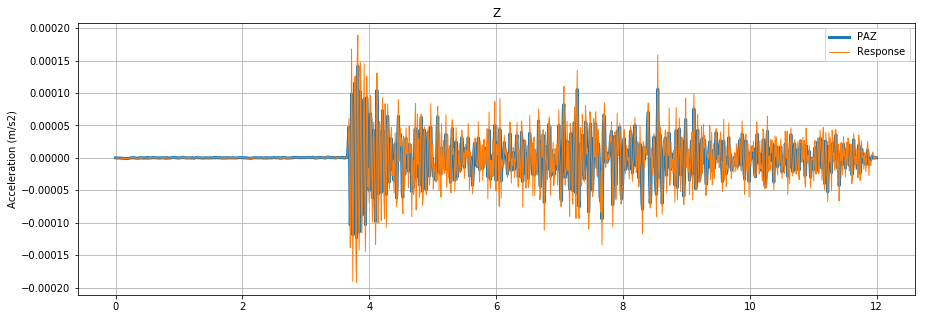

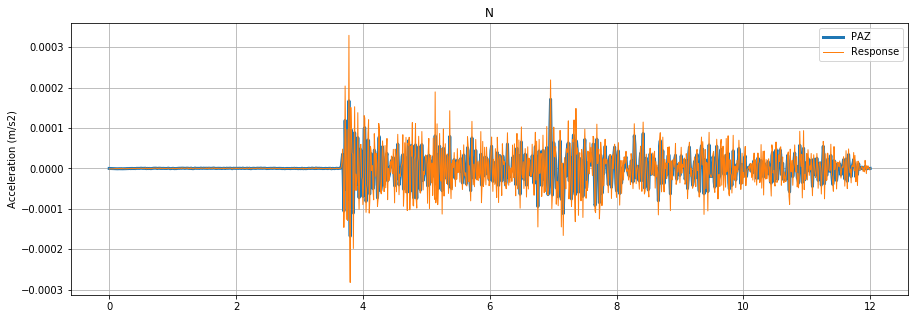

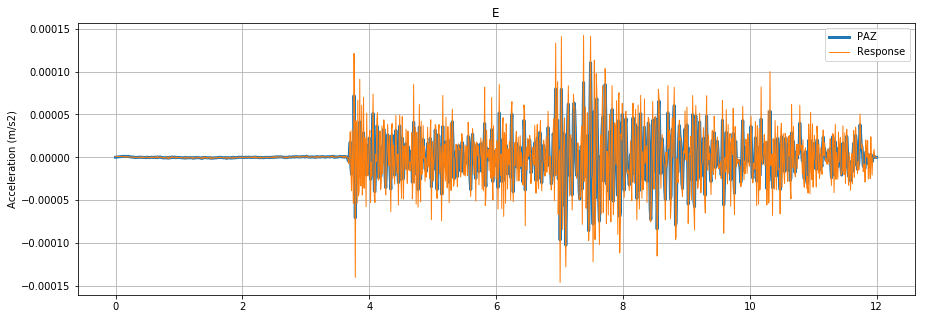

In [17]:
plot(memb1, memb2, ['PAZ', 'Response'], 'Acceleration (m/s2)')

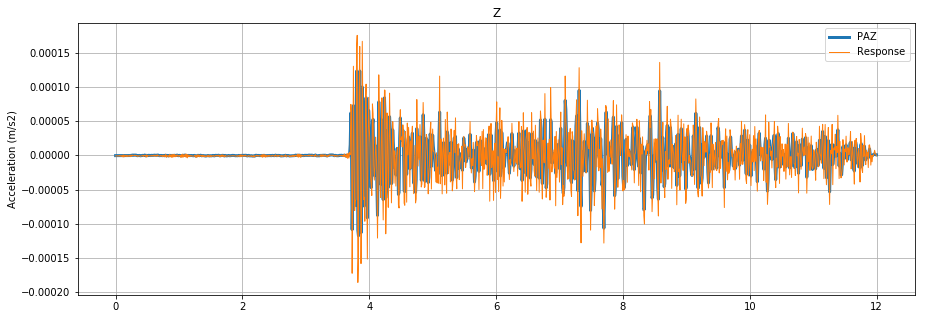

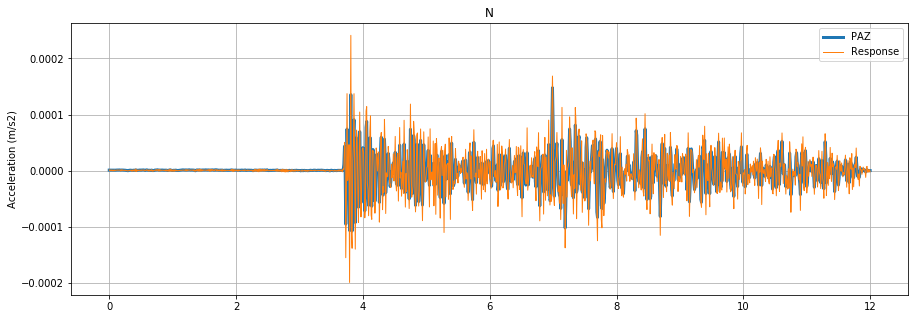

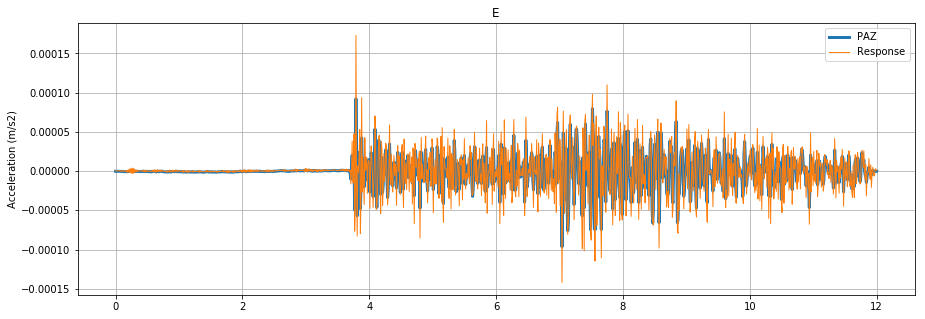

In [18]:
plot(mems1, mems2, ['PAZ', 'Response'], 'Acceleration (m/s2)')

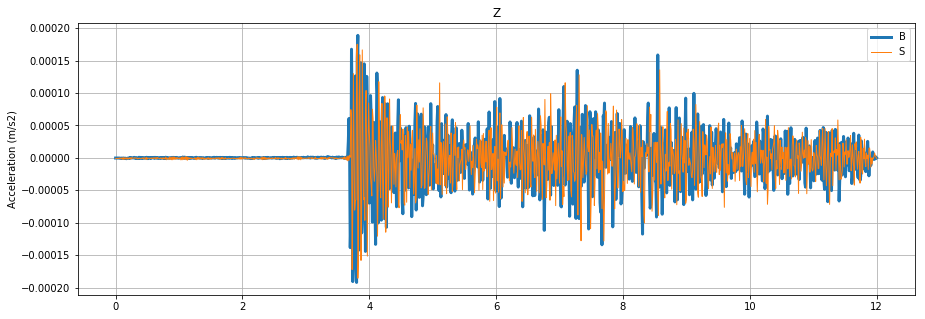

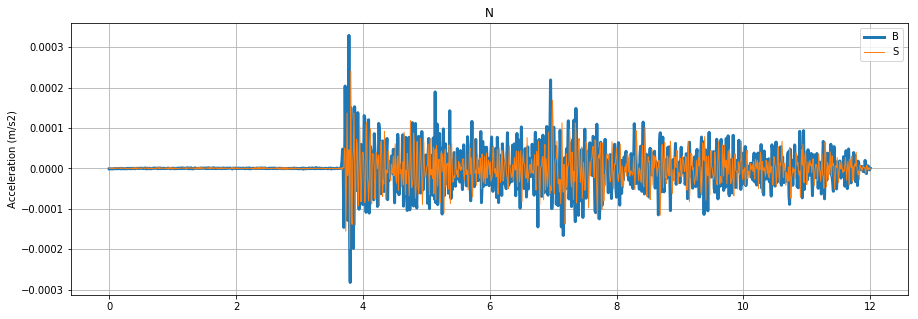

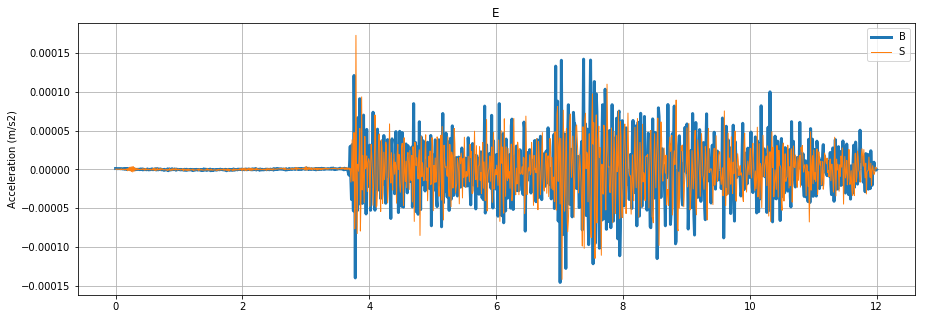

In [19]:
plot(memb2, mems2, ['B', 'S'], 'Acceleration (m/s2)')